In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss


import xgboost
from pycaret.classification import *
from pycaret.classification import load_model, predict_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=datasets.load_breast_cancer()

# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64

### Conc:
    No categorical features

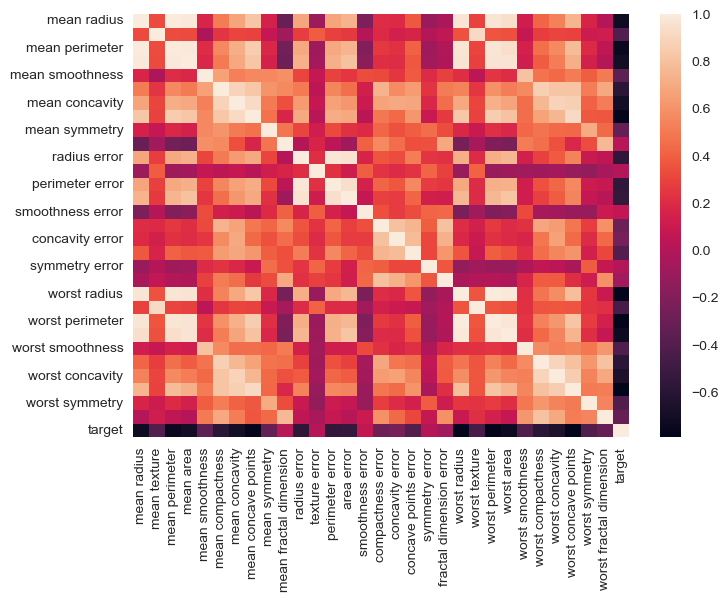

In [7]:
sns.heatmap(df.corr())
plt.show()

In [15]:
df_corr = df.corr()
df_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


### Conc:
    A lot of redundant features with high correlation

### To Do:
    Remove features having Correlation of more than 90%

In [20]:
# Find feature pairs with correlation > 0.9
high_correlation_pairs = np.where(np.abs(df_corr) > 0.9)

# Create a set to store pairs to remove
pairs_to_remove = set()

# Iterate through pairs and add to set
for feature1, feature2 in zip(*high_correlation_pairs):
    if feature1 != feature2 and (feature2, feature1) not in pairs_to_remove:
        pairs_to_remove.add((feature1, feature2))

# Display pairs with high correlation
print("Pairs with Correlation > 0.9:")
for feature1, feature2 in pairs_to_remove:
    correlation_value = df_corr.iloc[feature1, feature2]
    print(f"{df.columns[feature1]} - {df.columns[feature2]} (Correlation: {correlation_value:.2f})")

Pairs with Correlation > 0.9:
worst radius - worst area (Correlation: 0.98)
perimeter error - area error (Correlation: 0.94)
worst perimeter - worst area (Correlation: 0.98)
mean radius - mean perimeter (Correlation: 1.00)
mean area - worst perimeter (Correlation: 0.96)
radius error - perimeter error (Correlation: 0.97)
mean radius - worst area (Correlation: 0.94)
mean radius - worst radius (Correlation: 0.97)
mean perimeter - worst area (Correlation: 0.94)
mean texture - worst texture (Correlation: 0.91)
mean perimeter - worst radius (Correlation: 0.97)
worst radius - worst perimeter (Correlation: 0.99)
mean radius - worst perimeter (Correlation: 0.97)
mean concavity - mean concave points (Correlation: 0.92)
mean perimeter - worst perimeter (Correlation: 0.97)
mean concave points - worst concave points (Correlation: 0.91)
mean area - worst area (Correlation: 0.96)
mean radius - mean area (Correlation: 0.99)
mean area - worst radius (Correlation: 0.96)
radius error - area error (Correl

In [34]:
# Remove one feature from each high correlation pair
for feature1, feature2 in pairs_to_remove:
    # Choose which feature to remove out of the two based on the mean correlation with all the features
    if np.abs(df_corr.iloc[feature1, :].mean()) > np.abs(df_corr.iloc[feature2, :].mean()):
        feature_to_remove = df.columns[feature1]
    else:
        feature_to_remove = df.columns[feature2]
    df.drop(columns=feature_to_remove, inplace=True)

In [33]:
df.shape
# Hence 11 redundant features are removed

(569, 20)

In [36]:
# Display DataFrame after removing features
print("\nDataFrame after Removing Features:")
df


DataFrame after Removing Features:


,mean area,mean concave points,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1001.0,0.14710,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,184.60,2019.0,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1326.0,0.07017,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,158.80,1956.0,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,1203.0,0.12790,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,152.50,1709.0,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,386.1,0.10520,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,98.87,567.7,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,1297.0,0.10430,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,152.20,1575.0,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1479.0,0.13890,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,166.10,2027.0,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,1261.0,0.09791,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,155.00,1731.0,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,858.1,0.05302,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,126.70,1124.0,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,1265.0,0.15200,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,184.60,1821.0,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [37]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [61]:
212/(357+212)

0.37258347978910367

### To Do:
***
    Use other techniques to reduce features such as:
        Dimensionality Reduction:
            - Principal Component Analysis (PCA)
            - Linear Discriminant Analysis (LDA)
            - Wrapper Methods: Recurrsive feature elemination
            - Embeded Methods: Lasso

### Plot the features to see their distribution

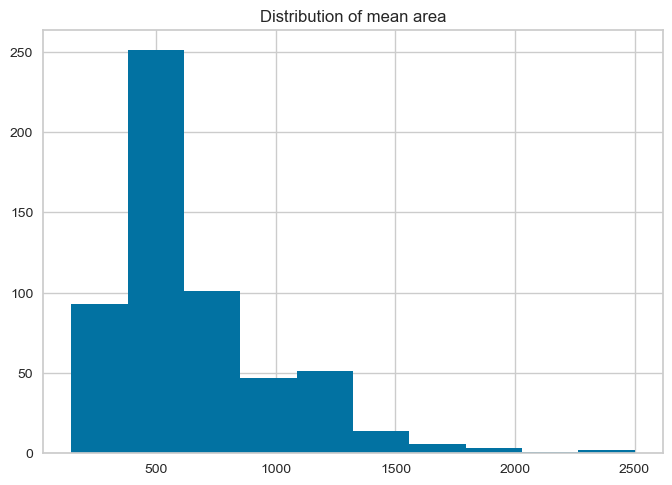

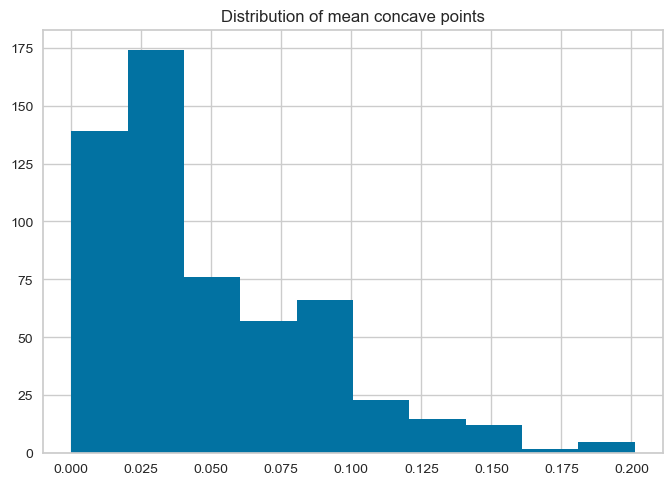

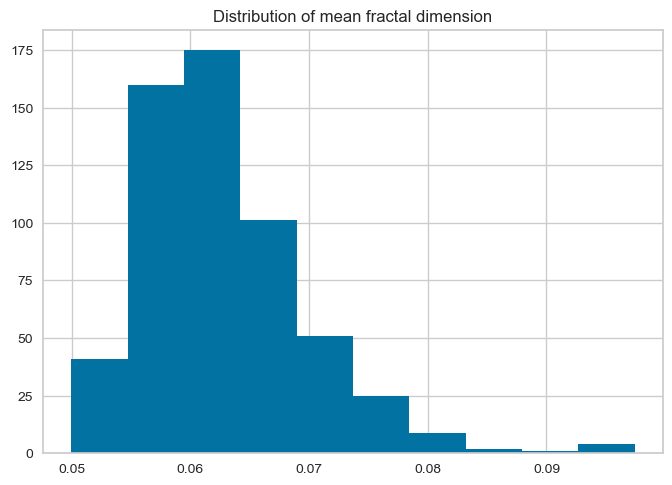

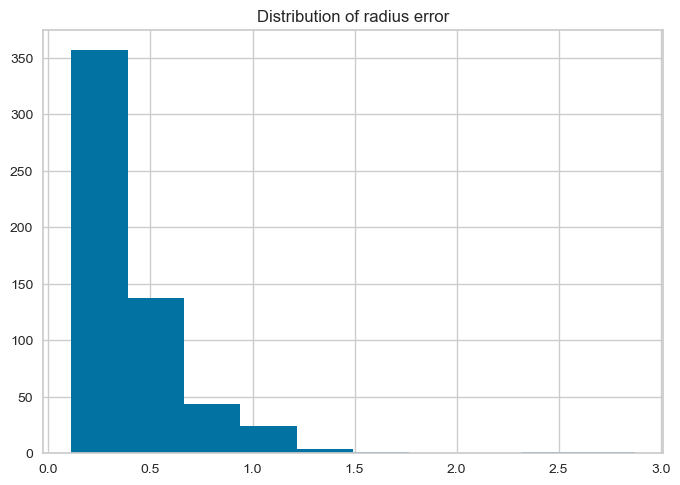

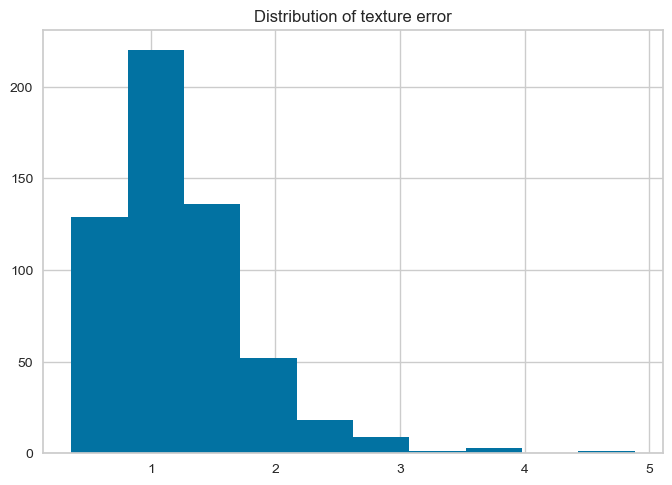

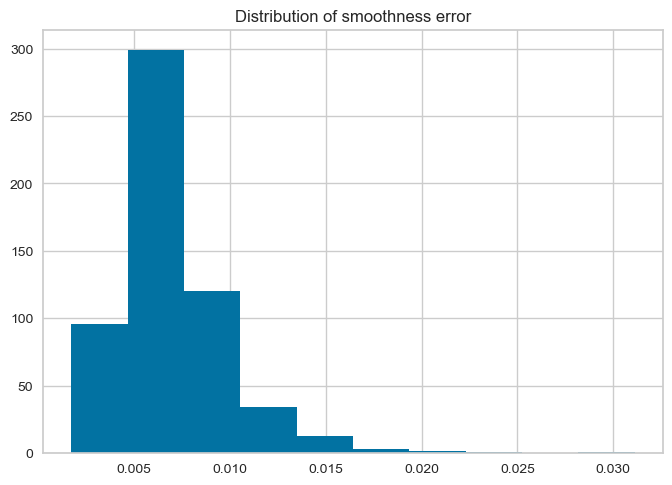

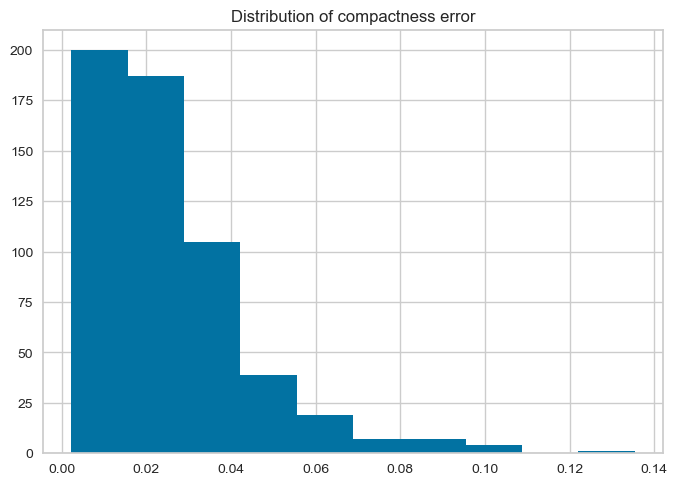

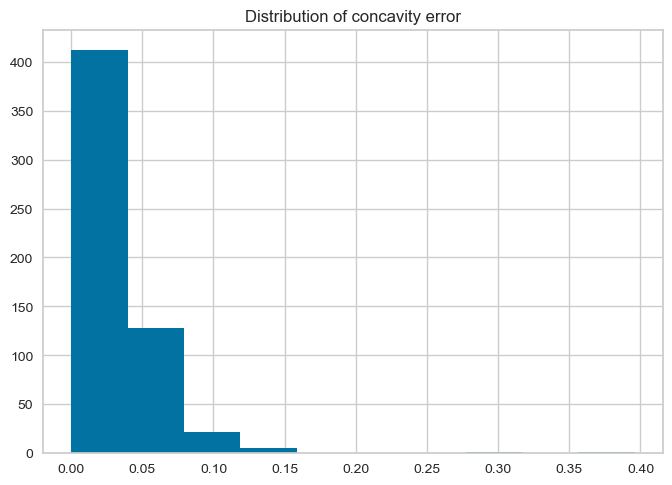

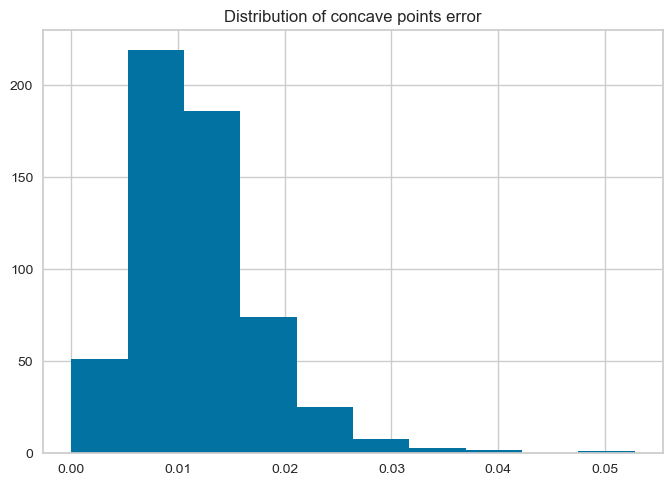

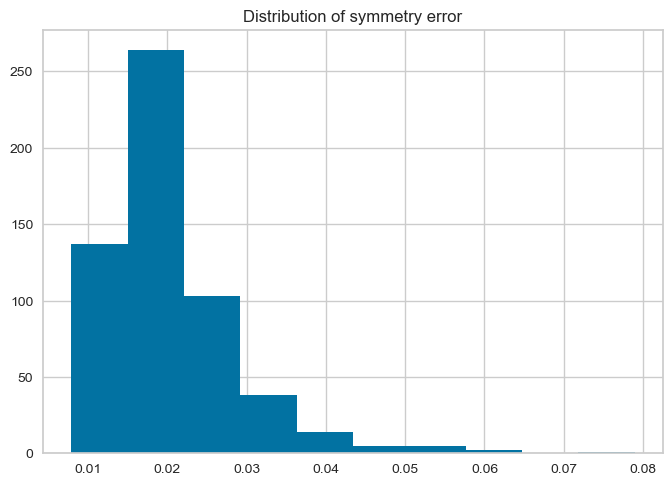

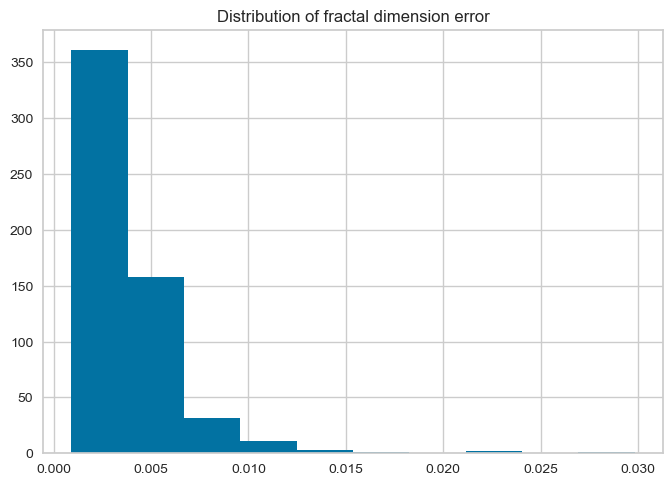

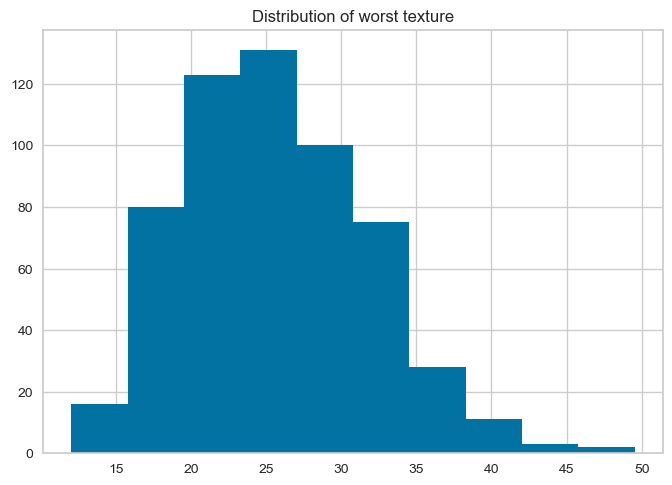

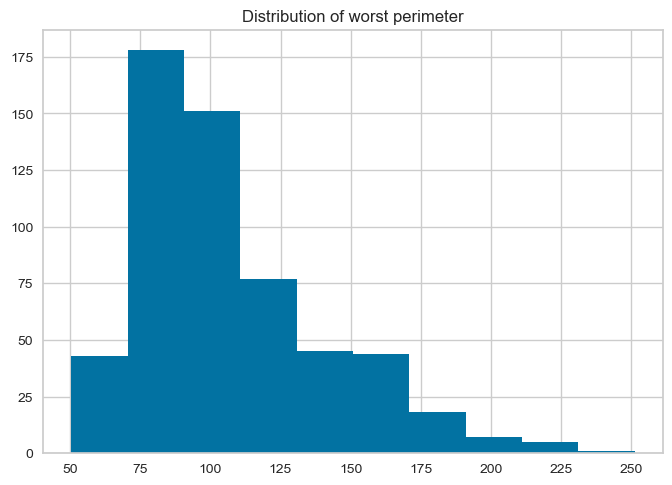

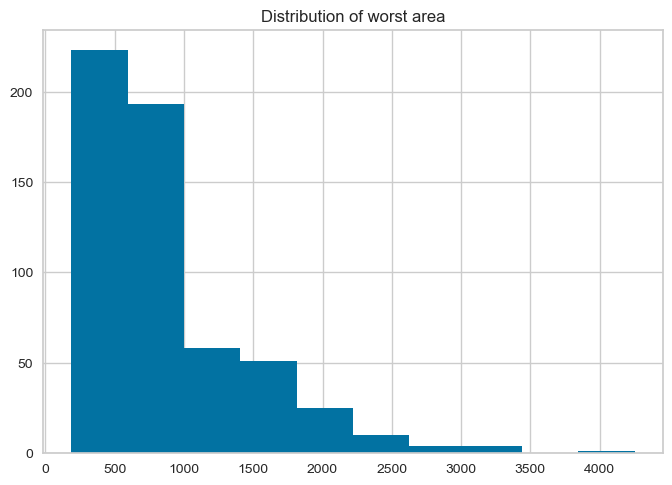

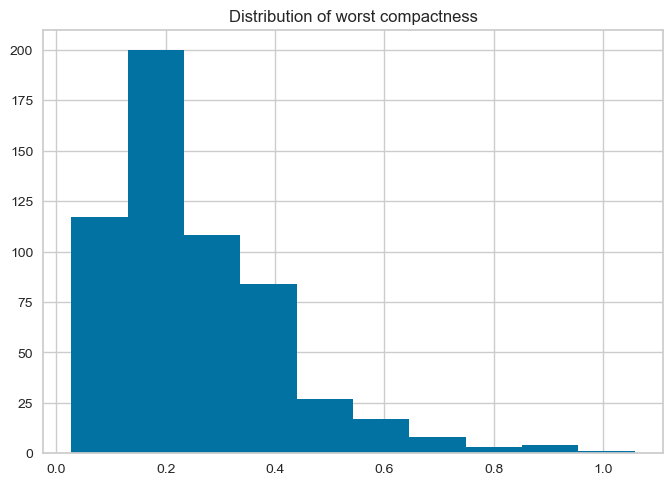

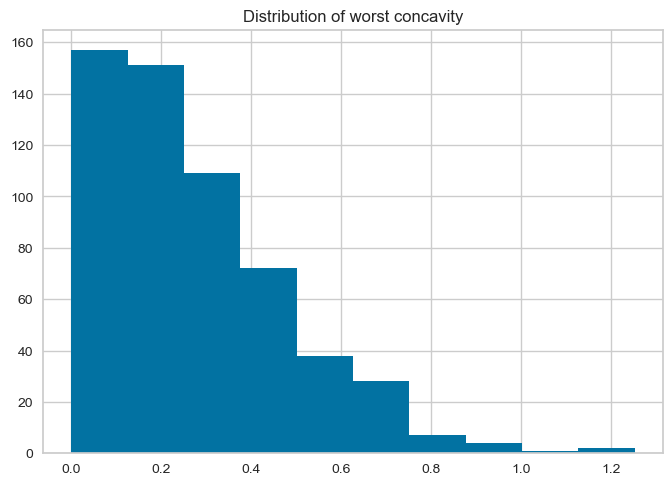

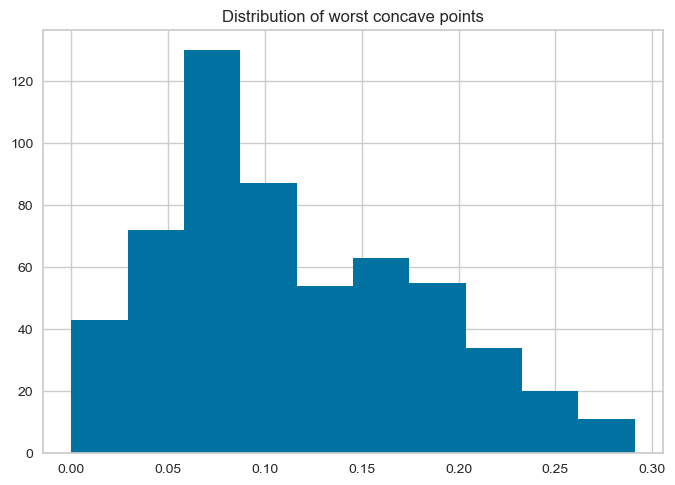

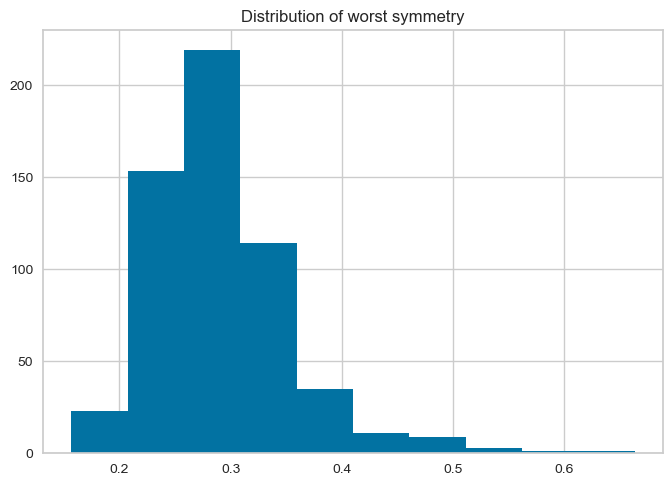

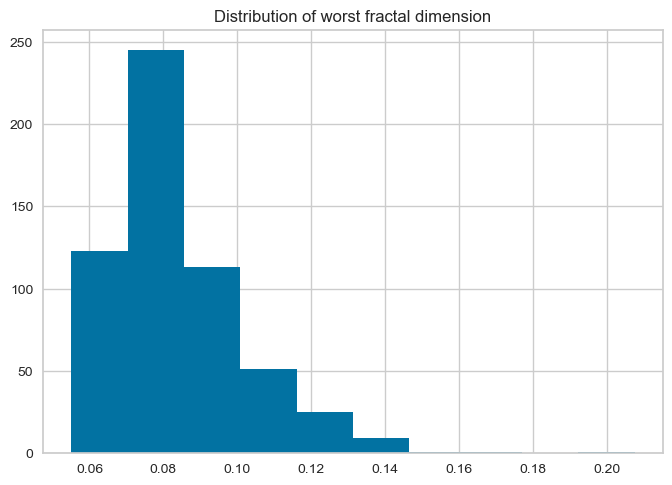

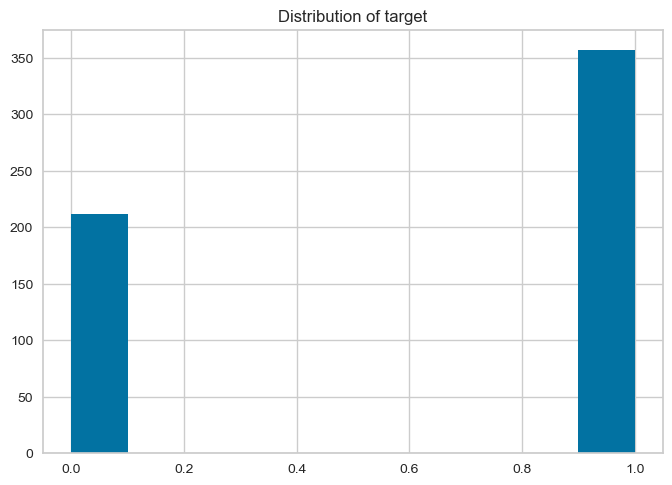

In [44]:
for i in df.columns:
    plt.hist(x=df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

### Conc:
    A lot of features are right skewed and some are close to normal distribution
    Can either use transformation(Log, box-cox or outliers removal)

In [45]:
df.min()

mean area                  143.500000
mean concave points          0.000000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst compactness            0.027290
worst concavity              0.000000
worst concave points         0.000000
worst symmetry               0.156500
worst fractal dimension      0.055040
target                       0.000000
dtype: float64

#### As it doesn't have any negative value so we can apply box-cox transformations which can't handle negatives and is mainly for right skewed data

### Outliers Profile

In [49]:
numeric_features = df.drop(['target'], axis=1)

# Calculate the IQR for each numeric feature
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Initialize counters
outlier_count = 0

In [52]:
# Iterate over each numeric feature
for column in numeric_features.columns:
    lower_outliers = (numeric_features[column] < lower_bound[column]).sum()
    upper_outliers = (numeric_features[column] > upper_bound[column]).sum()
    total_outliers = lower_outliers + upper_outliers
    
    print(f"Feature: {column}")
    print(f"Number of lower outliers: {lower_outliers}")
    print(f"Number of upper outliers: {upper_outliers}")
    print(f"Total number of outliers: {total_outliers}")
    
    total_records = len(numeric_features)
    percentage_outliers = (total_outliers / total_records) * 100
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")
    
    outlier_count += total_outliers

# Calculate total percentage of outliers in the dataset
total_records = len(numeric_features) * len(numeric_features.columns)
total_percentage_outliers = (outlier_count / total_records) * 100
print(f"Total Percentage of Outliers in Dataset: {total_percentage_outliers:.2f}%")


Feature: mean area
Number of lower outliers: 0
Number of upper outliers: 25
Total number of outliers: 25
Percentage of outliers: 4.39%

Feature: mean concave points
Number of lower outliers: 0
Number of upper outliers: 10
Total number of outliers: 10
Percentage of outliers: 1.76%

Feature: mean fractal dimension
Number of lower outliers: 0
Number of upper outliers: 15
Total number of outliers: 15
Percentage of outliers: 2.64%

Feature: radius error
Number of lower outliers: 0
Number of upper outliers: 38
Total number of outliers: 38
Percentage of outliers: 6.68%

Feature: texture error
Number of lower outliers: 0
Number of upper outliers: 20
Total number of outliers: 20
Percentage of outliers: 3.51%

Feature: smoothness error
Number of lower outliers: 0
Number of upper outliers: 30
Total number of outliers: 30
Percentage of outliers: 5.27%

Feature: compactness error
Number of lower outliers: 0
Number of upper outliers: 28
Total number of outliers: 28
Percentage of outliers: 4.92%

Fea

In [53]:
# Identify and remove outliers
outliers_removed = df[~((numeric_features < lower_bound) | (numeric_features > upper_bound)).any(axis=1)]

In [55]:
print(df.shape,outliers_removed.shape)

(569, 20) (420, 20)


In [56]:
outliers_removed['target'].value_counts()

1    304
0    116
Name: target, dtype: int64

In [59]:
304/(304+116)

0.7238095238095238

In [60]:
(569-420)/569

0.2618629173989455

### Conclusion:
    So by removing outliers we removed 26% of data and this deformed the target ratio even further from 63% to 72%
***
    Hence don't remove outliers, use some other technique to resolve the issue: Transformations
    1) Use Tree based algorithms without transformation
    2) Apply transformations and use for other algorithims

### Box-Cox Transformation

In [62]:
from scipy import stats

In [64]:
df

,mean area,mean concave points,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1001.0,0.14710,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,184.60,2019.0,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1326.0,0.07017,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,158.80,1956.0,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,1203.0,0.12790,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,152.50,1709.0,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,386.1,0.10520,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,98.87,567.7,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,1297.0,0.10430,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,152.20,1575.0,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1479.0,0.13890,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,166.10,2027.0,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,1261.0,0.09791,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,155.00,1731.0,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,858.1,0.05302,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,126.70,1124.0,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,1265.0,0.15200,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,184.60,1821.0,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [68]:
df.columns

Index(['mean area', 'mean concave points', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [86]:
for i in df.drop(['target'],axis=1).columns :
    df[i] = df[i] + 0.001

In [87]:
# Apply Box-Cox transformation to all columns in the DataFrame and store lambda values
transformed_data, lambda_values = [], []

for column in df.columns:
    transformed_column, lambda_value = stats.boxcox(df[column])
    transformed_data.append(transformed_column)
    lambda_values.append(lambda_value)

# Create a new DataFrame for the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=df.columns)

ValueError: Data must be positive.

In [81]:
len(transformed_data['mean area'][0])

569

### Stratified Sampling

In [75]:
X_train, X_test, y_train, y_test = train_test_split( df.drop(['target'],axis=1), df['target'], test_size=0.2, stratify=df['target'])

In [76]:
print(X_train.shape,X_test.shape)

(455, 19) (114, 19)


### Training models

### Function for Metric

In [99]:
def metrics(predicted, actual, prob, model):
    '''Takes Predicted values of model, actual value of data, predicted probability of positive class on X_test, model and returns metrics of the model'''
    
    print('Mertics of performance of',model, '\n\nAccuracy Score is ', accuracy_score(actual, predicted))
    print('\nF1 Score is ', f1_score(actual, predicted))
    print('\nConfusion Matrix\n', confusion_matrix(actual, predicted))
    print('\nROC score', roc_auc_score(actual, predicted))
    


    fpr, tpr, thresholds = roc_curve(actual, prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

### Decision Trees

Mertics of performance of DecisionTreeClassifier() 

Accuracy Score is  0.9385964912280702

F1 Score is  0.9523809523809524

Confusion Matrix
 [[37  5]
 [ 2 70]]

ROC score 0.9265873015873016


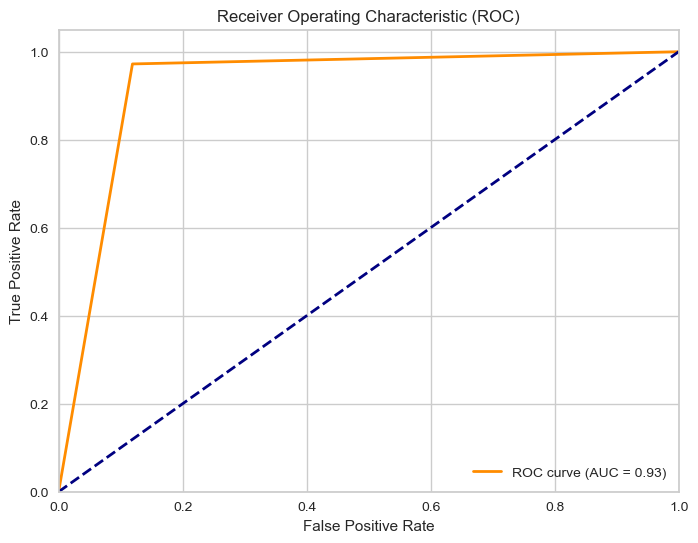

In [97]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:,1]
metrics(dt_pred,y_test,dt_prob,dt)

### Random Forest

In [88]:
rf = RandomForestClassifier()

Mertics of performance of RandomForestClassifier() 

Accuracy Score is  0.9736842105263158

F1 Score is  0.9795918367346939

Confusion Matrix
 [[39  3]
 [ 0 72]]

ROC score 0.9642857142857143


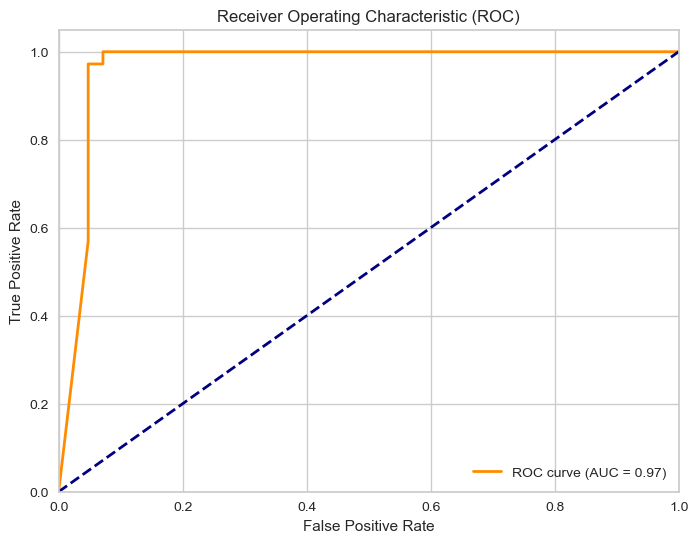

In [96]:
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_probab = rf.predict_proba(X_test)[:,1]  # Use the probability of the positive class
metrics(rf_pred, y_test,rf_probab,rf)

### Adaboost

Mertics of performance of AdaBoostClassifier() 

Accuracy Score is  0.9649122807017544

F1 Score is  0.9726027397260274

Confusion Matrix
 [[39  3]
 [ 1 71]]

ROC score 0.9573412698412699


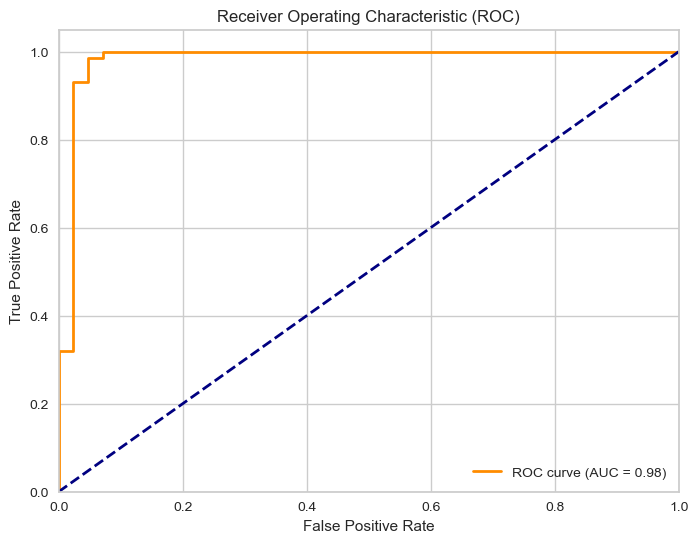

In [100]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
ada_prob = ada.predict_proba(X_test)[:,1]
metrics(ada_pred, y_test, ada_prob, ada)

Let's try some linear models

### Logistic Regression

Mertics of performance of LogisticRegression() 

Accuracy Score is  0.9385964912280702

F1 Score is  0.9523809523809524

Confusion Matrix
 [[37  5]
 [ 2 70]]

ROC score 0.9265873015873016


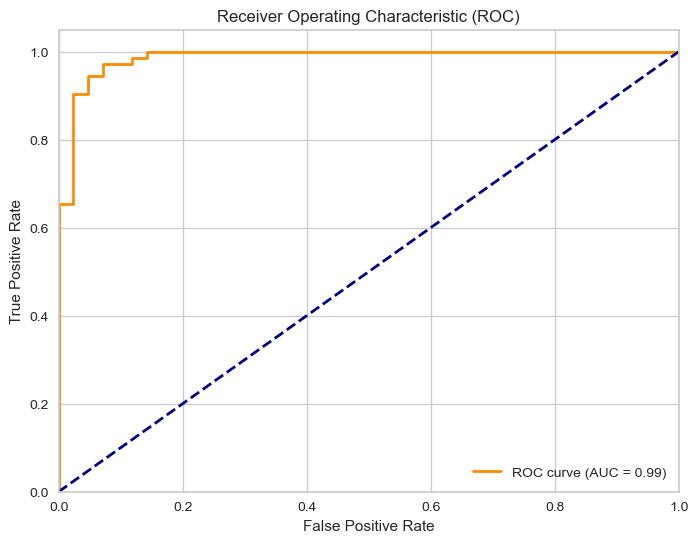

In [103]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
lgr_pred = lgr.predict(X_test)
lgr_prob = lgr.predict_proba(X_test)[:,1]
metrics(lgr_pred, y_test, lgr_prob, lgr)

### Support Vector Machines

Mertics of performance of SVC(probability=True) 

Accuracy Score is  0.9210526315789473

F1 Score is  0.9403973509933775

Confusion Matrix
 [[34  8]
 [ 1 71]]

ROC score 0.8978174603174603


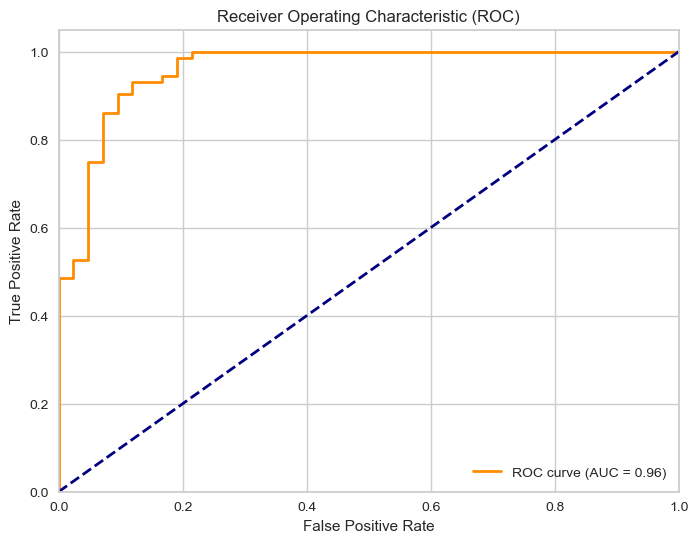

In [106]:
svr = SVC(probability=True)
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
svr_prob = svr.predict_proba(X_test)[:,1]
metrics(svr_pred,y_test,svr_prob,svr)

### Pycaret Classification

In [110]:
s = setup(data=df, target='target', session_id=123, data_split_stratify=True)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(569, 20)"
4,Transformed data shape,"(569, 20)"
5,Transformed train set shape,"(398, 20)"
6,Transformed test set shape,"(171, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [111]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9749,0.9935,0.9920,0.9702,0.9805,0.9454,0.9475,2.1010
lda,Linear Discriminant Analysis,0.9650,0.9888,0.9960,0.9525,0.9733,0.9228,0.9264,1.5140
lightgbm,Light Gradient Boosting Machine,0.9600,0.9885,0.9800,0.9582,0.9684,0.9138,0.9161,2.2870
qda,Quadratic Discriminant Analysis,0.9599,0.9857,0.9600,0.9761,0.9676,0.9149,0.9165,1.5940
ada,Ada Boost Classifier,0.9599,0.9861,0.9800,0.9589,0.9687,0.9131,0.9162,1.6320
xgboost,Extreme Gradient Boosting,0.9599,0.9872,0.9800,0.9579,0.9684,0.9137,0.9158,1.8770
rf,Random Forest Classifier,0.9549,0.9869,0.9720,0.9579,0.9644,0.9029,0.9046,1.8040
ridge,Ridge Classifier,0.9524,0.0000,0.9960,0.9341,0.9637,0.8948,0.8999,1.4400
gbc,Gradient Boosting Classifier,0.9499,0.9861,0.9760,0.9465,0.9607,0.8915,0.8936,1.6390
lr,Logistic Regression,0.9473,0.9901,0.9640,0.9541,0.9580,0.8871,0.8902,3.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [112]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [114]:
tuned_best = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9467,0.9200,0.9200,0.9200,0.7867,0.7867
1,0.9750,1.0000,1.0000,0.9615,0.9804,0.9459,0.9473
2,0.9500,1.0000,0.9200,1.0000,0.9583,0.8961,0.9010
3,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9627,0.9600,0.8889,0.9231,0.7808,0.7856
7,0.9250,0.9867,0.9200,0.9583,0.9388,0.8421,0.8433
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


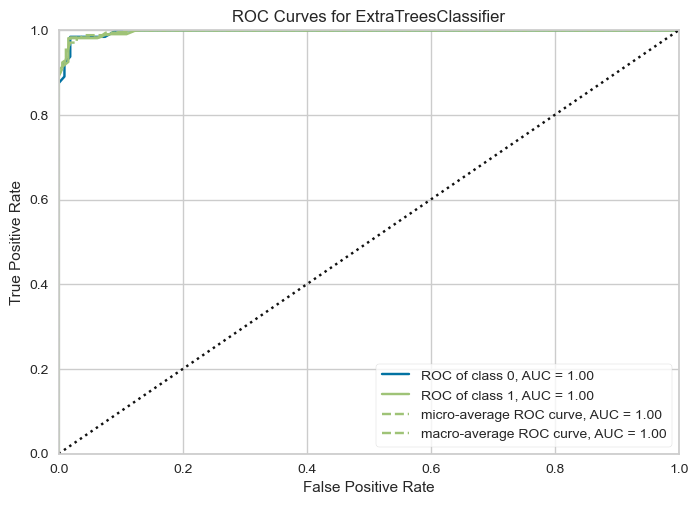

In [115]:
plot_model(tuned_best, plot = 'auc')

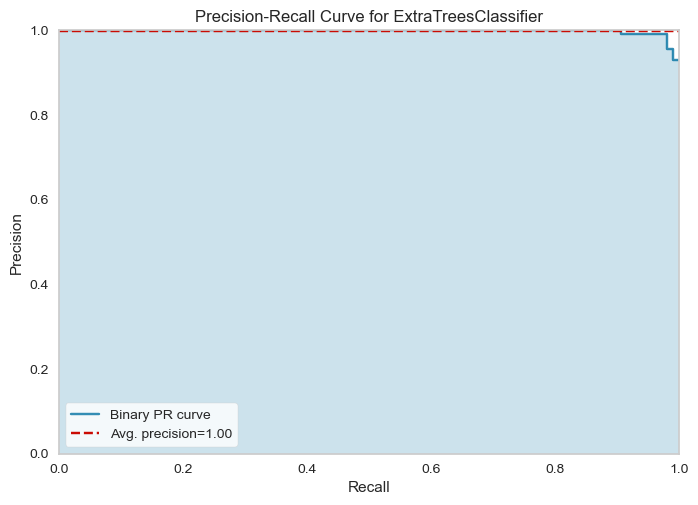

In [116]:
plot_model(tuned_best, plot = 'pr')

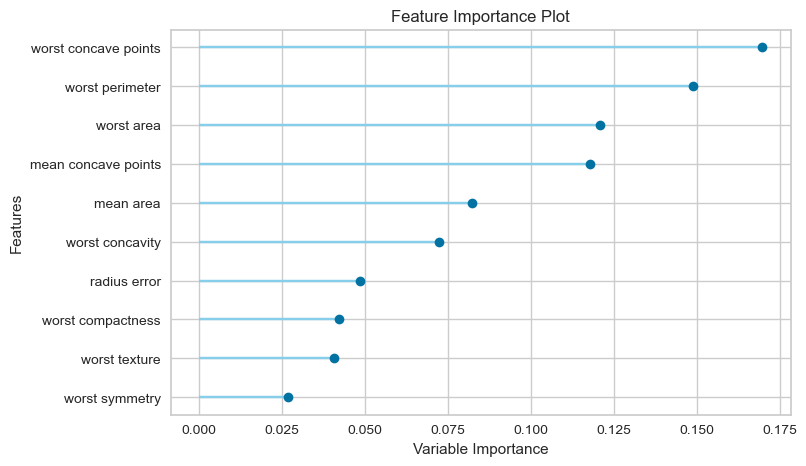

In [117]:
plot_model(tuned_best, plot='feature')

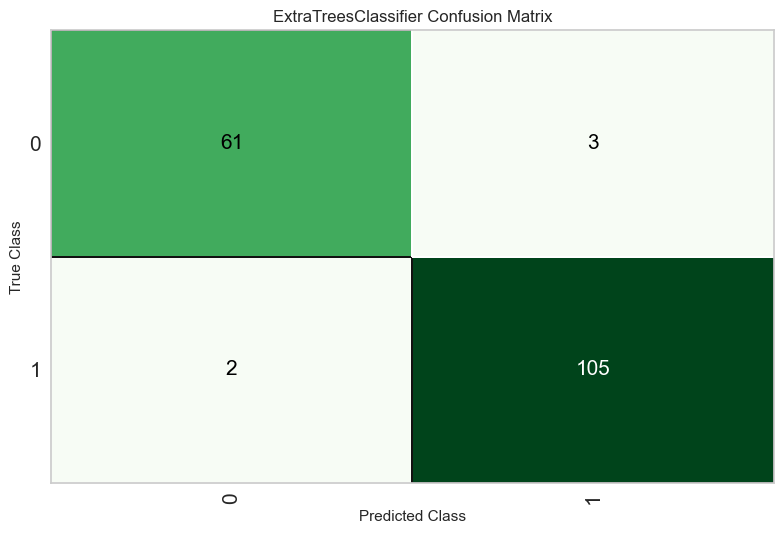

In [118]:
plot_model(tuned_best, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

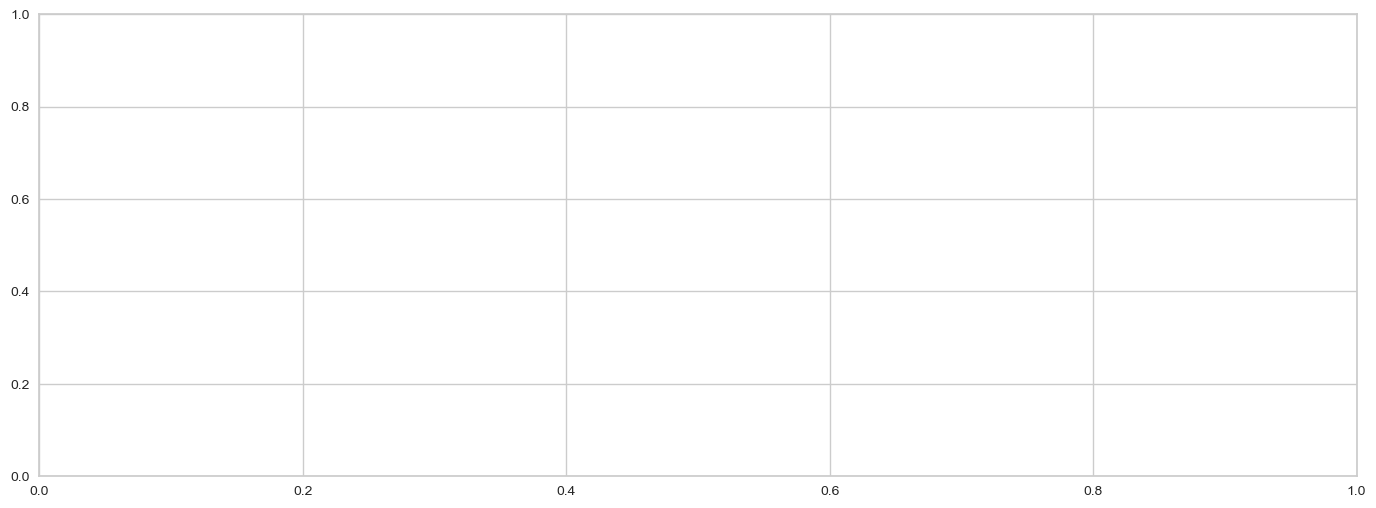

In [119]:
evaluate_model(tuned_best)

In [120]:
predict_model(tuned_best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9708,0.9972,0.9813,0.9722,0.9767,0.9374,0.9374


,mean area,mean concave points,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,...,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,prediction_label,prediction_score
192,288.101196,0.00120,0.06567,0.3551,4.8862,0.002913,0.007936,0.00120,0.001200,0.03919,...,62.251202,303.801208,0.02849,0.0012,0.00120,0.1921,0.06679,1,1,1.00
406,800.001221,0.04648,0.05995,0.2399,0.6384,0.005158,0.013660,0.01951,0.009947,0.01620,...,115.901199,947.901184,0.17340,0.2322,0.11410,0.2790,0.07132,1,1,0.76
204,481.901215,0.03941,0.06493,0.3973,1.0452,0.008153,0.020310,0.02821,0.011570,0.01902,...,96.051201,677.901184,0.23900,0.2683,0.10270,0.3026,0.08870,1,1,0.90
20,520.001221,0.03230,0.06931,0.1864,0.7489,0.005297,0.020180,0.01818,0.007690,0.01798,...,96.091202,630.501221,0.27880,0.1902,0.07403,0.3196,0.08303,1,1,0.98
244,1155.001221,0.09006,0.06120,0.5255,1.8032,0.011810,0.033720,0.04035,0.016790,0.02306,...,144.901199,1417.001221,0.29800,0.3470,0.15760,0.2932,0.07734,0,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1203.001221,0.12910,0.06119,0.7468,0.7881,0.007350,0.041260,0.03952,0.021780,0.02370,...,152.501205,1709.001221,0.42570,0.4516,0.24420,0.3625,0.08878,0,0,1.00
476,618.401184,0.03178,0.06129,0.3490,1.0192,0.005307,0.034080,0.02941,0.014700,0.01730,...,112.101196,828.501221,0.34410,0.2524,0.13510,0.2546,0.07978,1,1,0.73
262,947.801208,0.07627,0.05584,0.8360,1.6342,0.007917,0.061010,0.04758,0.022690,0.02867,...,137.901199,1295.001221,0.28790,0.2310,0.15400,0.3079,0.07604,0,0,0.97
481,602.901184,0.02190,0.05714,0.3328,0.9276,0.004904,0.012020,0.01650,0.007475,0.01182,...,104.401199,830.501221,0.14270,0.1685,0.08270,0.2368,0.07723,1,1,0.84


In [121]:
# finalize rf model
final_best = finalize_model(tuned_best)

# print final model parameters
print(final_best)

Pipeline(memory=FastMemory(location=C:\Users\RAJAT~1.SHA\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mean area', 'mean concave points',
                                             'mean fractal dimension',
                                             'radius error', 'texture error',
                                             'smoothness error',
                                             'compactness error',
                                             'concavity error',
                                             'concave points error',
                                             'symmetry error',
                                             'fractal dimension error'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=Non

In [122]:
# saving the final model
save_model(final_best,'Pycar_Classific')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\RAJAT~1.SHA\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['mean area', 'mean concave points',
                                              'mean fractal dimension',
                                              'radius error', 'texture error',
                                              'smoothness error',
                                              'compactness error',
                                              'concavity error',
                                              'concave points error',
                                              'symmetry error',
                                              'fractal dimension error'...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                     